## 1. Importing Packages and Reading Data

In [1]:
import os
import pandas as pd 
import numpy as np
import seaborn as sns
from math import sqrt
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Capstone Project\Smartphone Price Prediction Machine Learning Project\ndtv_data_final.csv")
data.head()

Unnamed: 0                            Name    Brand  \
0           0  OnePlus 7T Pro McLaren Edition  OnePlus   
1           1                   Realme X2 Pro   Realme   
2           2               iPhone 11 Pro Max    Apple   
3           3                       iPhone 11    Apple   
4           4                    LG G8X ThinQ       LG   

                    Model  Battery capacity (mAh)  Screen size (inches)  \
0  7T Pro McLaren Edition                    4085                  6.67   
1                  X2 Pro                    4000                  6.50   
2       iPhone 11 Pro Max                    3969                  6.50   
3               iPhone 11                    3110                  6.10   
4               G8X ThinQ                    4000                  6.40   

  Touchscreen  Resolution x  Resolution y  Processor  ...  Rear camera  \
0         Yes          1440          3120          8  ...         48.0   
1         Yes          1080          2400          8  ...         64.0   
2         Yes          1242          2688          6  ...         12.0   
3         Yes           828          1792          6  ...         12.0   
4         Yes          1080          2340          8  ...         12.0   

   Front camera  Operating system  Wi-Fi Bluetooth  GPS Number of SIMs   3G  \
0          16.0           Android    Yes       Yes  Yes              2  Yes   
1          16.0           Android    Yes       Yes  Yes              2  Yes   
2          12.0               iOS    Yes       Yes  Yes              2  Yes   
3          12.0               iOS    Yes       Yes  Yes              2  Yes   
4          32.0           Android    Yes       Yes  Yes              1   No   

   4G/ LTE   Price  
0      Yes   58998  
1      Yes   27999  
2      Yes  106900  
3      Yes   62900  
4       No   49990  

[5 rows x 22 columns]

### Data Types and Dimensions

In [4]:
print("Shape:", data.shape)

Shape: (1359, 22)


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1359 non-null   int64  
 1   Name                    1359 non-null   object 
 2   Brand                   1359 non-null   object 
 3   Model                   1359 non-null   object 
 4   Battery capacity (mAh)  1359 non-null   int64  
 5   Screen size (inches)    1359 non-null   float64
 6   Touchscreen             1359 non-null   object 
 7   Resolution x            1359 non-null   int64  
 8   Resolution y            1359 non-null   int64  
 9   Processor               1359 non-null   int64  
 10  RAM (MB)                1359 non-null   int64  
 11  Internal storage (GB)   1359 non-null   float64
 12  Rear camera             1359 non-null   float64
 13  Front camera            1359 non-null   float64
 14  Operating system        1359 non-null   

## 2. Exploratory Data Analysis

### 1. Numerical Features

#### Univariate Analysis

#### a. Descriptive Statistics 

In [64]:
data.describe()

Unnamed: 0  Battery capacity (mAh)  Screen size (inches)  \
count  1359.000000             1359.000000           1359.000000   
mean    679.000000             2938.489330              5.291310   
std     392.453819              873.514133              0.671357   
min       0.000000             1010.000000              2.400000   
25%     339.500000             2300.000000              5.000000   
50%     679.000000             3000.000000              5.200000   
75%    1018.500000             3500.000000              5.700000   
max    1358.000000             6000.000000              7.300000   

       Resolution x  Resolution y    Processor      RAM (MB)  \
count   1359.000000   1359.000000  1359.000000   1359.000000   
mean     811.543046   1490.777778     5.551141   2488.777778   
std      270.707271    557.780120     2.196562   1664.440386   
min      240.000000    320.000000     1.000000     64.000000   
25%      720.000000   1280.000000     4.000000   1000.000000   
50%      720.000000   1280.000000     4.000000   2000.000000   
75%     1080.000000   1920.000000     8.000000   3000.000000   
max     2160.000000   3840.000000    10.000000  12000.000000   

       Internal storage (GB)  Rear camera  Front camera  Number of SIMs  \
count            1359.000000  1359.000000   1359.000000     1359.000000   
mean               30.654864    12.070199      7.037969        1.833701   
std                36.950241     8.948337      6.295448        0.374457   
min                 0.064000     0.000000      0.000000        1.000000   
25%                 8.000000     8.000000      2.000000        2.000000   
50%                16.000000    12.200000      5.000000        2.000000   
75%                32.000000    13.000000      8.000000        2.000000   
max               512.000000   108.000000     48.000000        3.000000   

               Price  
count    1359.000000  
mean    11465.825607  
std     13857.497077  
min       494.000000  
25%      4763.500000  
50%      6999.000000  
75%     11999.000000  
max    174990.000000

#### b. Distribution of Numerical features

Text(0.5, 1.0, 'Front camera Distribution')

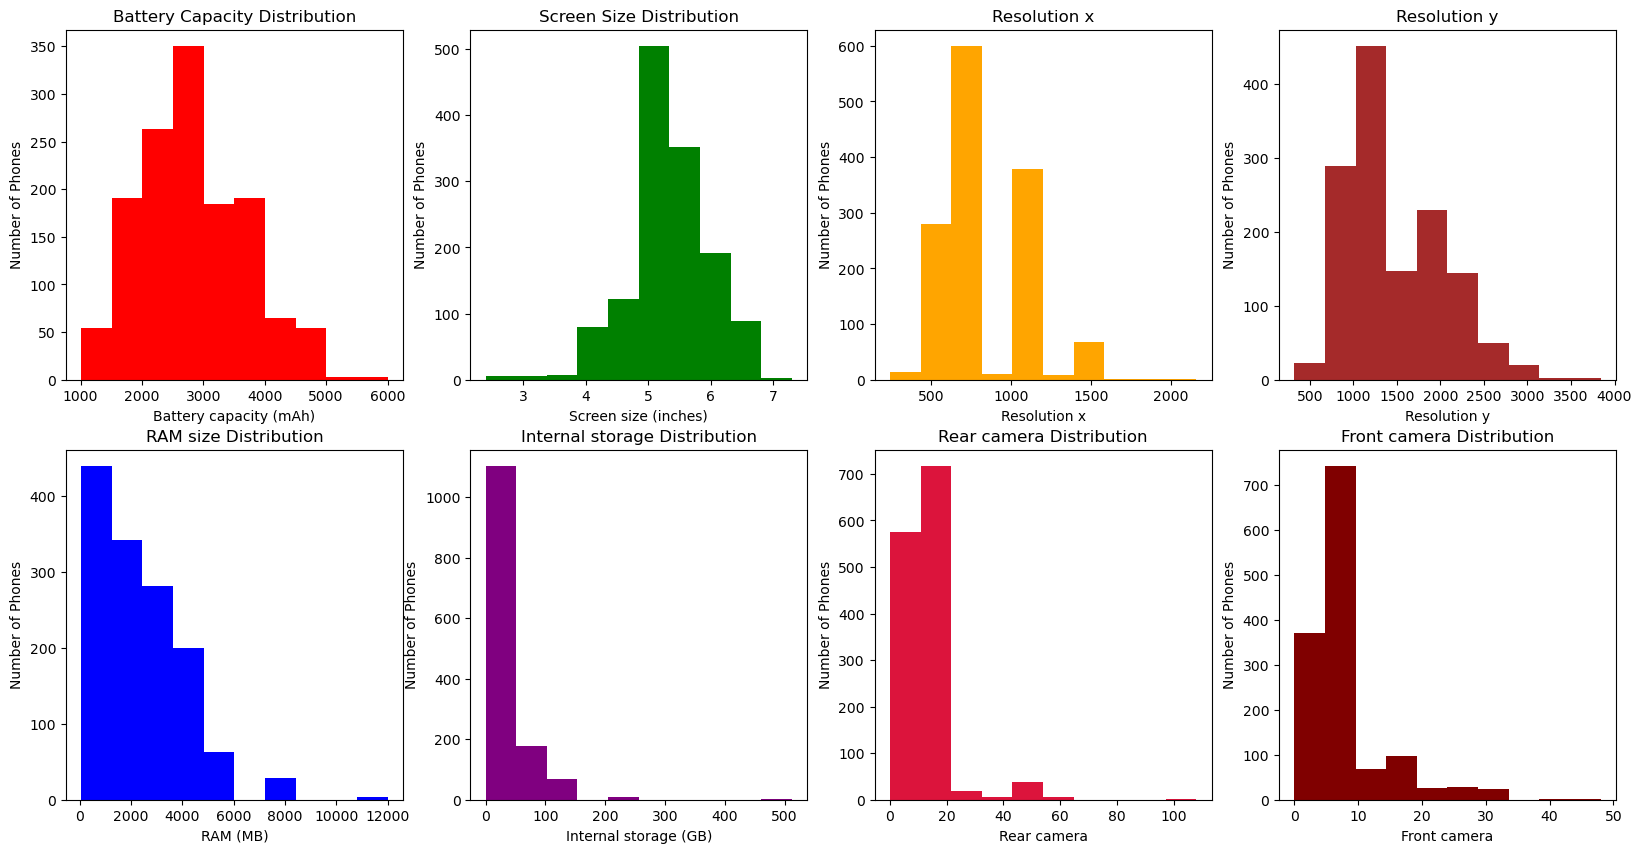

In [65]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

axes[0, 0].hist(data=data, x='Battery capacity (mAh)', color='red')
axes[0, 0].set_xlabel('Battery capacity (mAh)')
axes[0, 0].set_ylabel('Number of Phones')
axes[0, 0].set_title('Battery Capacity Distribution')

axes[0, 1].hist(data=data, x='Screen size (inches)', color='green')
axes[0, 1].set_xlabel('Screen size (inches)')
axes[0, 1].set_ylabel('Number of Phones')
axes[0, 1].set_title('Screen Size Distribution')

axes[0, 2].hist(data=data, x='Resolution x', color='orange')
axes[0, 2].set_xlabel('Resolution x')
axes[0, 2].set_ylabel('Number of Phones')
axes[0, 2].set_title('Resolution x')

axes[0, 3].hist(data=data, x='Resolution y', color='brown')
axes[0, 3].set_xlabel('Resolution y')
axes[0, 3].set_ylabel('Number of Phones')
axes[0, 3].set_title('Resolution y')

axes[1, 0].hist(data=data, x='RAM (MB)', color='blue')
axes[1, 0].set_xlabel('RAM (MB)')
axes[1, 0].set_ylabel('Number of Phones')
axes[1, 0].set_title('RAM size Distribution')

axes[1, 1].hist(data=data, x='Internal storage (GB)', color='purple')
axes[1, 1].set_xlabel('Internal storage (GB)')
axes[1, 1].set_ylabel('Number of Phones')
axes[1, 1].set_title('Internal storage Distribution')

axes[1, 2].hist(data=data, x='Rear camera', color='crimson')
axes[1, 2].set_xlabel('Rear camera')
axes[1, 2].set_ylabel('Number of Phones')
axes[1, 2].set_title('Rear camera Distribution')

axes[1, 3].hist(data=data, x='Front camera', color='maroon')
axes[1, 3].set_xlabel('Front camera')
axes[1, 3].set_ylabel('Number of Phones')
axes[1, 3].set_title('Front camera Distribution')

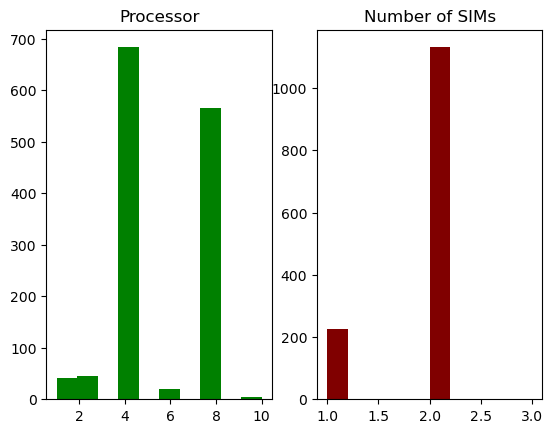

In [66]:
plt.subplot(1,2,1)
plt.hist(data=data, x='Processor', color='green')
plt.title('Processor')

plt.subplot(1,2,2)
plt.hist(data=data, x='Number of SIMs', color='maroon')
plt.title('Number of SIMs')
plt.show()

**Battery Capacity Distribution**
* Majority of the smartphones have a Battery Capacity between 2000 to 4000 mAh.

**RAM**
* Majority of the phones have a RAM size between 500 MB to 6 GB. The phones with the highest memory has RAM size 12 GB

**Processor**
* Most phones have 4 or 8 cores of the processor

**Internal Storage**
* Most phones have an internal storage between 0.064 and 64 GB

**Front Camera & Rear Camera**
* Most front cameras have 5 MP and rear cameras have 12 MP on average.

#### Bivariate Analysis

#### c. Scatter Plot of Numerical Features vs Target Feature(Price)

Text(0.5, 1.0, 'RAM (MB) y vs. Price')

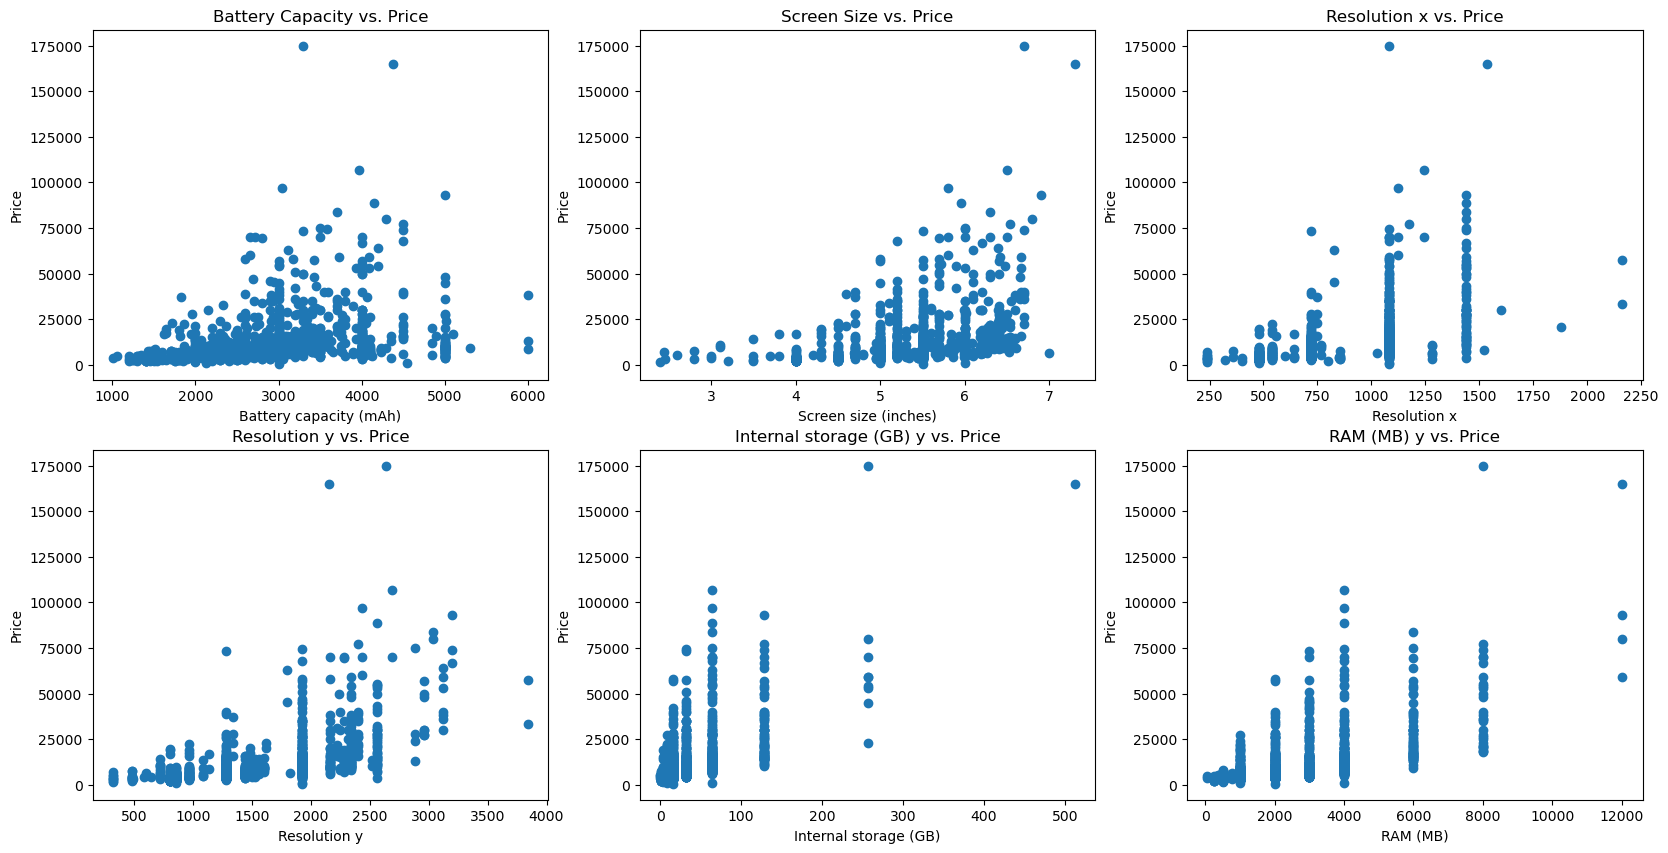

In [71]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

axes[0, 0].scatter(data['Battery capacity (mAh)'], data['Price'])
axes[0, 0].set_xlabel('Battery capacity (mAh)')
axes[0, 0].set_ylabel('Price')
axes[0, 0].set_title('Battery Capacity vs. Price')

axes[0, 1].scatter(data['Screen size (inches)'], data['Price'])
axes[0, 1].set_xlabel('Screen size (inches)')
axes[0, 1].set_ylabel('Price')
axes[0, 1].set_title('Screen Size vs. Price')

axes[0, 2].scatter(data['Resolution x'], data['Price'])
axes[0, 2].set_xlabel('Resolution x')
axes[0, 2].set_ylabel('Price')
axes[0, 2].set_title('Resolution x vs. Price')

axes[1, 0].scatter(data['Resolution y'], data['Price'])
axes[1, 0].set_xlabel('Resolution y')
axes[1, 0].set_ylabel('Price')
axes[1, 0].set_title('Resolution y vs. Price')


axes[1, 1].scatter(data['Internal storage (GB)'], data['Price'])
axes[1, 1].set_xlabel('Internal storage (GB)')
axes[1, 1].set_ylabel('Price')
axes[1, 1].set_title('Internal storage (GB) y vs. Price')

axes[1, 2].scatter(data['RAM (MB)'], data['Price'])
axes[1, 2].set_xlabel('RAM (MB)')
axes[1, 2].set_ylabel('Price')
axes[1, 2].set_title('RAM (MB) y vs. Price')

Text(0.5, 1.0, 'Front camera x vs. Price')

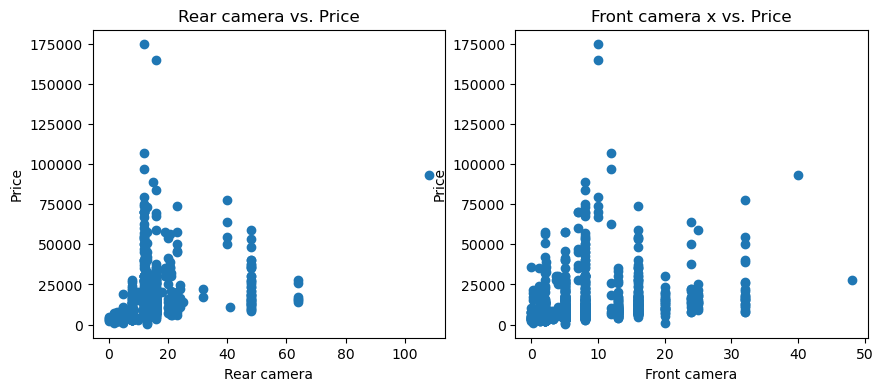

In [247]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].scatter(data['Rear camera'], data['Price'])
axes[0].set_xlabel('Rear camera')
axes[0].set_ylabel('Price')
axes[0].set_title('Rear camera vs. Price')

axes[1].scatter(data['Front camera'], data['Price'])
axes[1].set_xlabel('Front camera')
axes[1].set_ylabel('Price')
axes[1].set_title('Front camera x vs. Price')

### 2. Categorical Features

#### Univariate Aanalysis

#### a. Descriptive Statistics 

In [72]:
data.describe(include='object')

Name  Brand Model Touchscreen  \
count                             1359   1359  1359        1359   
unique                            1359     76  1321           2   
top     OnePlus 7T Pro McLaren Edition  Intex    V5         Yes   
freq                                 1    117     4        1342   

       Operating system Wi-Fi Bluetooth   GPS    3G 4G/ LTE  
count              1359  1359      1359  1359  1359    1359  
unique                7     2         2     2     2       2  
top             Android   Yes       Yes   Yes   Yes     Yes  
freq               1299  1351      1344  1251  1214    1012

#### b. Visualizing count of categorical features

**1. Operating System**

<Axes: xlabel='Operating system', ylabel='count'>

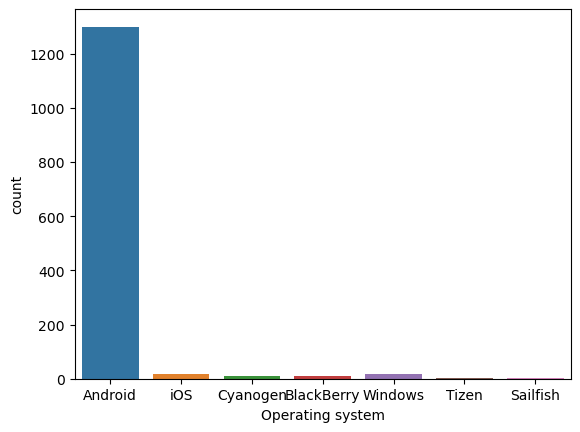

In [74]:
sns.countplot(x='Operating system', data=data)

**2. Count of Phones with Touchscreen, Wi-Fi, Bluetooth, GPS, 3G, 4G/LTE, Number of SIMs, Processor**

<Axes: xlabel='Processor', ylabel='count'>

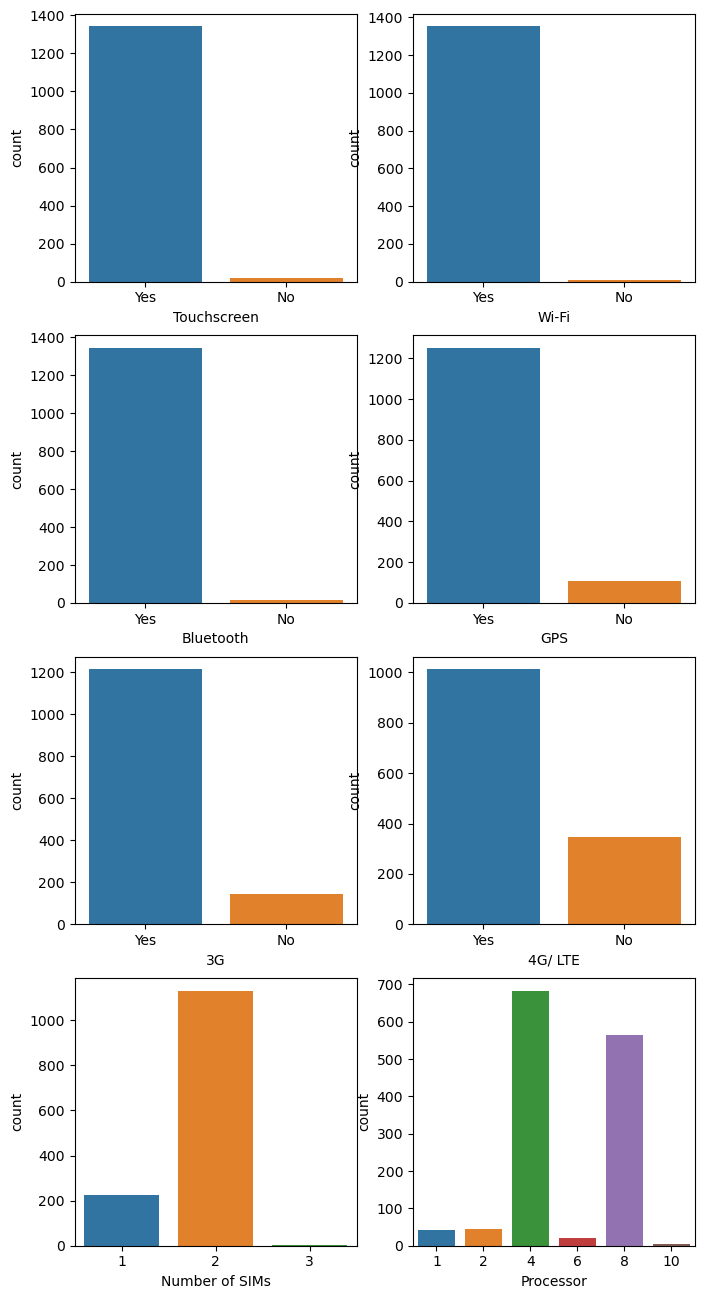

In [75]:
fig, axarr  = plt.subplots(4,2,figsize=(8,16))
sns.countplot(x='Touchscreen', data=data, ax=axarr[0,0])
sns.countplot(x='Wi-Fi', data=data, ax=axarr[0,1])
sns.countplot(x='Bluetooth', data=data, ax=axarr[1,0])
sns.countplot(x='GPS', data=data, ax=axarr[1,1])
sns.countplot(x='3G', data=data, ax=axarr[2,0])
sns.countplot(x='4G/ LTE', data=data, ax=axarr[2,1])
sns.countplot(x='Number of SIMs', data=data, ax=axarr[3,0])
sns.countplot(x='Processor', data=data, ax=axarr[3,1])

Pie Graph representing the percentage of phones with Wifi Bluetooth Touchscreen GPS and 3G

In [76]:
colors = ("green","red")
explode = (0.0,0.2)
touch_count = data["Touchscreen"].value_counts()
touch_count = list(touch_count)
label1 = data["Touchscreen"].unique()
label1=list(label1)

wifi_count = data["Wi-Fi"].value_counts()
wifi_count = list(wifi_count)
label2 = data["Wi-Fi"].unique()
label2=list(label2)

bluetooth_count = data["Bluetooth"].value_counts()
bluetooth_count = list(bluetooth_count)
label3 = data["Bluetooth"].unique()
label3=list(label3)

gps_count = data["GPS"].value_counts()
gps_count = list(gps_count)
label4 = data["GPS"].unique()
label4=list(label4)

threeg_count = data["3G"].value_counts()
threeg_count = list(threeg_count)
label5 = data["3G"].unique()
label5=list(label5)

fourg_count = data["3G"].value_counts()
fourg_count = list(threeg_count)
label6 = data["3G"].unique()
label6=list(label6)

Text(0.5, 1.0, 'Percentage of phones with 4G/LTE')

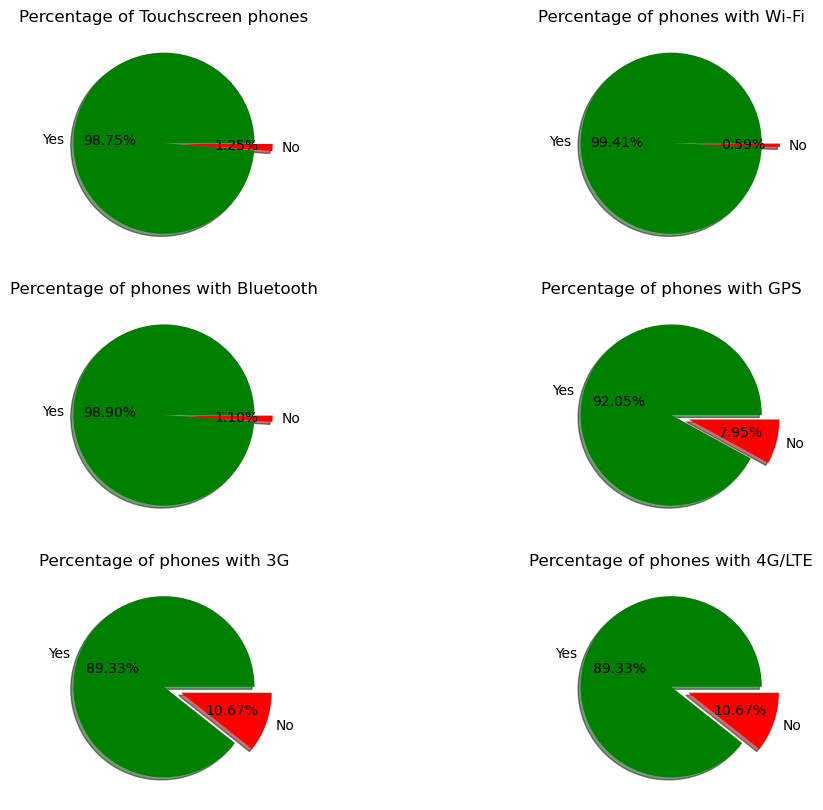

In [77]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

axes[0, 0].pie(touch_count, explode=explode, labels=label1, colors=colors , shadow=True, autopct='%1.2f%%')
axes[0, 0].set_title("Percentage of Touchscreen phones")

axes[0, 1].pie(wifi_count, explode=explode, labels=label2, colors=colors , shadow=True, autopct='%1.2f%%')
axes[0, 1].set_title("Percentage of phones with Wi-Fi")

axes[1, 0].pie(bluetooth_count, explode=explode, labels=label3, colors=colors , shadow=True, autopct='%1.2f%%')
axes[1, 0].set_title("Percentage of phones with Bluetooth")

axes[1, 1].pie(gps_count, explode=explode, labels=label4, colors=colors , shadow=True, autopct='%1.2f%%')
axes[1, 1].set_title("Percentage of phones with GPS")

axes[2, 0].pie(threeg_count, explode=explode, labels=label5, colors=colors , shadow=True, autopct='%1.2f%%')
axes[2, 0].set_title("Percentage of phones with 3G")

axes[2, 1].pie(fourg_count, explode=explode, labels=label6, colors=colors , shadow=True, autopct='%1.2f%%')
axes[2, 1].set_title("Percentage of phones with 4G/LTE")

**Insights based on the above mobile features data**

* 98.75% of the Phones have Touchscreen
* 99.41% of the Phones come with the feature of Wi-Fi
* 98.90% of the Phones are Bluetooth enabled
* 92.05% of the Phones come with the feature of GPS
* 89.33% of the Phones have 3G
* 99.41% of the Phones have 4G/LTE
* Most phones have the ability for dual SIM

## Bivariate Analysis

#### Categorical to Categorical Variable

In [78]:
pd.crosstab(data["Operating system"], data["4G/ LTE"])

4G/ LTE            No  Yes
Operating system          
Android           331  968
BlackBerry          4    6
Cyanogen            3    7
Sailfish            0    1
Tizen               1    2
Windows             8   11
iOS                 0   17

* Majority of the Android Phones come with 4G/LTE feature.
* All the iOS Phones come with 4G/LTE feature.

In [79]:
pd.crosstab(data["Operating system"], data["Number of SIMs"])

Number of SIMs      1     2  3
Operating system              
Android           188  1110  1
BlackBerry         10     0  0
Cyanogen            2     8  0
Sailfish            0     1  0
Tizen               0     3  0
Windows            16     3  0
iOS                11     6  0

**Insights**

* Almost 85.5% of the Android Phones have dual SIM feature.
* Almost 15.8% of the Windows Phones have dual SIM feature.
* Almost 35.3% of the iOS Phones have dual SIM feature.
* Blackberry Phones have only 1 SIM feature.
* All Sail Fish and Tizen Phones have dual SIM feature.
* Only 1 Android Phone has the feature of 3 SIMs.

In [80]:
pd.crosstab(data["Operating system"], data["Processor"])

Processor         1   2    4   6    8   10
Operating system                          
Android           33  25  666  10  561   4
BlackBerry         3   6    1   0    0   0
Cyanogen           2   3    2   0    3   0
Sailfish           0   0    1   0    0   0
Tizen              0   0    3   0    0   0
Windows            1   8    8   1    1   0
iOS                3   3    2   9    0   0

* Majority have the Android Phones have either 4 core or 8 core Processor.
* Majority of the iOS Phones have 6 core Processor.
* Majority of the Windows Phones have 2 core or 4 core Processor.

In [100]:
pd.crosstab(data["Operating system"], data["3G"])

3G                 No   Yes
Operating system           
Android           141  1158
BlackBerry          1     9
Cyanogen            3     7
Sailfish            0     1
Tizen               0     3
Windows             0    19
iOS                 0    17

* Majority have the Android Phones are 3G enabled.
* All of the iOS Phones are 3G enabled.
* All of the Windows Phones are 3G enabled.
* Majority of the Blackberry Phones are 3G enabled.
* Majority of the Cyanogen Phones are 3G enabled.
* All of the Sailfish and Tizen Phones are 3G enabled.

In [101]:
pd.crosstab(data["Operating system"], data["RAM (MB)"])

RAM (MB)          64     256    289    384    512    768    1000   2000   \
Operating system                                                           
Android               0      7      1      1     64      2    336    325   
BlackBerry            0      0      0      0      2      0      1      6   
Cyanogen              2      0      0      0      3      0      0      3   
Sailfish              0      0      0      0      0      0      0      1   
Tizen                 0      0      0      0      0      0      3      0   
Windows               0      1      0      0      3      0     10      2   
iOS                   0      0      0      0      0      0      3      5   

RAM (MB)          3000   4000   6000   8000   12000  
Operating system                                     
Android             274    193     63     29      4  
BlackBerry            1      0      0      0      0  
Cyanogen              1      1      0      0      0  
Sailfish              0      0      0      0      0  
Tizen                 0      0      0      0      0  
Windows               2      1      0      0      0  
iOS                   4      5      0      0      0

* Majority have the Android Phones have RAM size between 1000 MB to 6000 MB.
* Majority have the iOS Phones have RAM size between 1000 MB to 4000 MB.
* Majority have the Windows Phones have RAM size between 1000 MB to 4000 MB.
* Majority have the BlackBerry Phones have RAM size of 2000 MB.
* Majority have the Cyanogen Phones have RAM size of 2000 MB.
* All the Tizen Phones have RAM size of 1000 MB.

In [102]:
pd.crosstab(data["Operating system"], data["Internal storage (GB)"])

Internal storage (GB)  0.064    0.128    0.160    0.512    1.000    2.000    \
Operating system                                                              
Android                      0        0        1        7        2        1   
BlackBerry                   0        0        0        2        0        0   
Cyanogen                     1        1        0        0        0        0   
Sailfish                     0        0        0        0        0        0   
Tizen                        0        0        0        0        0        0   
Windows                      0        0        0        0        0        0   
iOS                          0        0        0        0        0        0   

Internal storage (GB)  3.000    4.000    8.000    16.000   32.000   64.000   \
Operating system                                                              
Android                      1       59      304      402      275      168   
BlackBerry                   0        0        2        5        1        0   
Cyanogen                     0        3        0        4        1        0   
Sailfish                     0        0        0        1        0        0   
Tizen                        0        0        3        0        0        0   
Windows                      0        0       11        2        5        1   
iOS                          0        0        1        5        2        9   

Internal storage (GB)  128.000  256.000  512.000  
Operating system                                  
Android                     69        9        1  
BlackBerry                   0        0        0  
Cyanogen                     0        0        0  
Sailfish                     0        0        0  
Tizen                        0        0        0  
Windows                      0        0        0  
iOS                          0        0        0

* Amongst Android Operating system majority of the phones have an Internal Storage of 16 GB or 8 GB or 32 GB.
* Amongst iOS Operating system majority of the phones have an Internal Storage of 64 GB or 16 GB.
* Amongst Windows Operating system majority of the phones have an Internal Storage of 8 GB or 32 GB.
* Amongst BlackBerry Operating system majority of the phones have an Internal Storage of 16 GB.

In [103]:
pd.crosstab(data["Processor"], data["Internal storage (GB)"])

Internal storage (GB)  0.064    0.128    0.160    0.512    1.000    2.000    \
Processor                                                                     
1                            1        1        1        9        0        0   
2                            0        0        0        0        0        0   
4                            0        0        0        0        2        1   
6                            0        0        0        0        0        0   
8                            0        0        0        0        0        0   
10                           0        0        0        0        0        0   

Internal storage (GB)  3.000    4.000    8.000    16.000   32.000   64.000   \
Processor                                                                     
1                            1        4       13        8        2        2   
2                            0       12       22        9        2        0   
4                            0       45      272      273       74       14   
6                            0        0        0        5        4       10   
8                            0        1       14      124      198      152   
10                           0        0        0        0        4        0   

Internal storage (GB)  128.000  256.000  512.000  
Processor                                         
1                            0        0        0  
2                            0        0        0  
4                            1        1        0  
6                            1        0        0  
8                           67        8        1  
10                           0        0        0

* Phones with 4 core Processor have an Internal Storage of 8 GB, 16 GB, 32 GB and 64 GB.
* Phones with 6 core Processor have an Internal Storage of 16 GB, 32 GB and 64 GB.
* Phones with 8 core Processor have an Internal Storage of 16 GB, 32 GB, 64 GB and 128 GB.
* Phones with 10 core Processor have an Internal Storage of 32 GB.

#### Categorical to Numerical Variable

In [104]:
data.groupby(["Operating system"]).agg({"Price":["min","max","mean","sum","count"]})

Price                                      
                   min     max          mean       sum count
Operating system                                            
Android            494  174990  10989.947652  14275942  1299
BlackBerry        5500   19000  10509.600000    105096    10
Cyanogen          1249   29999   9173.600000     91736    10
Sailfish          4799    4799   4799.000000      4799     1
Tizen             3599    4990   4459.666667     13379     3
Windows           3850   88719  16706.684211    317427    19
iOS               8499  106900  45510.470588    773678    17

**Insights**<br>
<br>
**The highest price of a smartphone according to the Operating system is as follows:**
* For Android the highest price is 174990
* For iOS the highest price is 106900
* For Windows the highest price is 88719
* For BlackBerry the highest price is 19000
* For Cyanogen the highest price is 29999
* For Sailfish the highest price is 4799
* For Tizen the highest price is 4990

**Best Phone in specific group price category based on RAM size and specific price categories**

In [105]:
grouped_data = data.groupby(pd.cut(data['Price'], bins=[0, 20000, 40000, 60000, float('inf')]))

best_phones = []
for category, group in grouped_data:
    best_phone = group.loc[group['RAM (MB)'].idxmax()]
    best_phones.append(best_phone)

best_phones_df = pd.DataFrame(best_phones)

best_phones_df=best_phones_df[['Price', 'Brand', 'Model', 'RAM (MB)', 'Battery capacity (mAh)', 'Screen size (inches)']]
best_phones_df.insert(0, "Price Category", ["0-20K","20K-40K","40K-60K","Above 60K"], True)
best_phones_df

Price Category  Price    Brand                   Model  RAM (MB)  \
250          0-20K  18690     Oppo                     F15      8000   
5          20K-40K  34930  OnePlus                      7T      8000   
0          40K-60K  58998  OnePlus  7T Pro McLaren Edition     12000   
7        Above 60K  79699  Samsung         Galaxy Note 10+     12000   

     Battery capacity (mAh)  Screen size (inches)  
250                    4000                  6.40  
5                      3800                  6.55  
0                      4085                  6.67  
7                      4300                  6.80

#### Top 5 Phones based on specific features

In [106]:
sorted_data = data.sort_values('Battery capacity (mAh)', ascending=False)
top_5_battery_capacity = sorted_data.head(5)

sorted_data = data.sort_values('Rear camera', ascending=False)
top_5_rear_camera = sorted_data.head(5)

sorted_data = data.sort_values('Front camera', ascending=False)
top_5_front_camera = sorted_data.head(5)

print("Top 5 Phones with Highest Battery Capacity:")
print(top_5_battery_capacity[['Brand', 'Model', 'Battery capacity (mAh)']])

print("\nTop 5 Phones with Highest Rear Camera Resolution:")
print(top_5_rear_camera[['Brand', 'Model', 'Rear camera']])

print("\nTop 5 Phones with Highest Front Camera Resolution:")
print(top_5_front_camera[['Brand', 'Model', 'Front camera']])  

Top 5 Phones with Highest Battery Capacity:
       Brand        Model  Battery capacity (mAh)
78   Samsung  Galaxy M30s                    6000
8       Asus  ROG Phone 2                    6000
621    Tecno  Spark Power                    6000
157   Xiaomi     Mi Max 2                    5300
358   Lenovo           P2                    5100

Top 5 Phones with Highest Rear Camera Resolution:
       Brand             Model  Rear camera
614  Samsung  Galaxy S20 Ultra        108.0
68      Poco                X2         64.0
1     Realme            X2 Pro         64.0
75    Realme                X2         64.0
82    Xiaomi  Redmi Note 8 Pro         64.0

Top 5 Phones with Highest Front Camera Resolution:
       Brand             Model  Front camera
89      Asus                6Z          48.0
614  Samsung  Galaxy S20 Ultra          40.0
72      Vivo               V17          32.0
251     Vivo            S1 Pro          32.0
275    Honor               20i          32.0


Insights from Exploratory data analysis:

1. Battery Capacity and Price:
    Phones with higher battery capacities generally have higher prices, providing extended usage without frequent charging.<br>
    
2. Screen Size and Price:
    There is no clear linear relationship between screen size and price. Mid-range phones may offer larger screens for immersive experiences, while premium phones prioritize compactness.
<br>
3. Camera Quality and Price:
    Phones with higher camera resolutions often come at higher prices, catering to photography enthusiasts.
<br>
4. Operating System Popularity:
    Android is the dominant operating system, indicating a diverse Android market with multiple brands and versions.
<br>
5. Best Phones in Each Price Category:
*    Affordable (0-20k): Phones like Oppo F15 offer budget-friendly options with decent performance and features.
*    Mid-range (20k-40k): OnePlus 7T strikes a balance between performance and price, appealing to a broad user base.
*    Upper mid-range (40k-60k): OnePlus 7T Pro McLaren Edition targets users seeking premium features and design.
*    Premium (60k+): Samsung Galaxy Note 10+ offers top-notch specifications and camera capabilities for power users.
*    Camera Specifications in High-End Phones:
<br>
6. Majority of the phones come with features such as "Touchscreen", "GPS", "Wi-Fi", "Bluetooth"and "3G". Hence they have less impact on the price of the phone.
<br>
* High-end phones boast impressive rear and front camera resolutions, ensuring stunning photo and video experiences.

## 3. Correlation Matrix

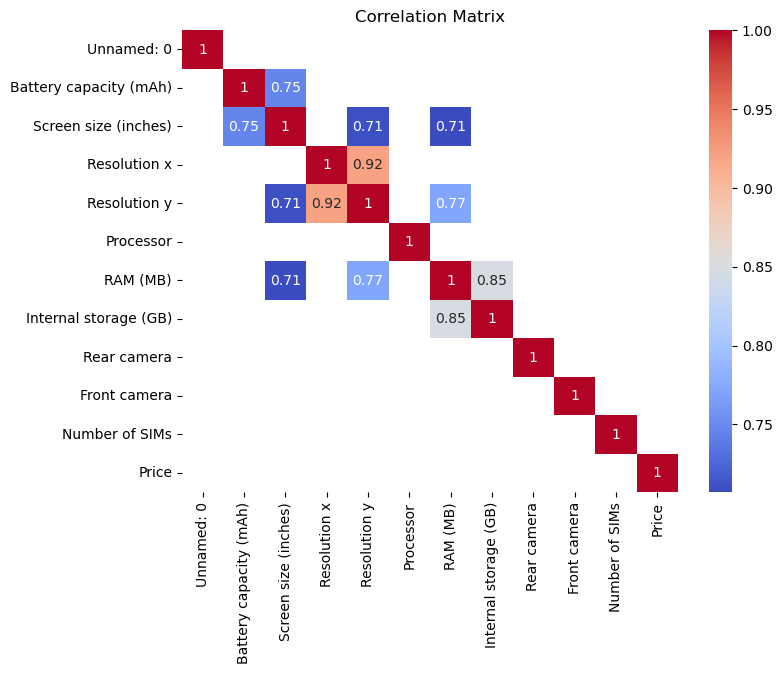

In [107]:
plt.figure(figsize=(8,6))
num_var=data.dtypes[data.dtypes!="object"].index
correlation_matrix = data[num_var].corr()
sns.heatmap(correlation_matrix[correlation_matrix>.7],vmax=1.0, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

* Resolution x and Resolution y have a very high correlation with each other.
* The correlation betweem RAM and Internal storage is also high. It implies as the Ram size increases the phones have a higher Internal storage.

## 4.Feature Engineering

### Combining Resolution x and Resolution y to create ppi(pixels per inch)

In [264]:
data.head()

Unnamed: 0                            Name    Brand  \
0           0  OnePlus 7T Pro McLaren Edition  OnePlus   
1           1                   Realme X2 Pro   Realme   
2           2               iPhone 11 Pro Max    Apple   
3           3                       iPhone 11    Apple   
4           4                    LG G8X ThinQ       LG   

                    Model  Battery capacity (mAh)  Screen size (inches)  \
0  7T Pro McLaren Edition                    4085                  6.67   
1                  X2 Pro                    4000                  6.50   
2       iPhone 11 Pro Max                    3969                  6.50   
3               iPhone 11                    3110                  6.10   
4               G8X ThinQ                    4000                  6.40   

  Touchscreen  Resolution x  Resolution y  Processor  ...  Rear camera  \
0         Yes          1440          3120          8  ...         48.0   
1         Yes          1080          2400          8  ...         64.0   
2         Yes          1242          2688          6  ...         12.0   
3         Yes           828          1792          6  ...         12.0   
4         Yes          1080          2340          8  ...         12.0   

   Front camera  Operating system  Wi-Fi Bluetooth  GPS Number of SIMs   3G  \
0          16.0           Android    Yes       Yes  Yes              2  Yes   
1          16.0           Android    Yes       Yes  Yes              2  Yes   
2          12.0               iOS    Yes       Yes  Yes              2  Yes   
3          12.0               iOS    Yes       Yes  Yes              2  Yes   
4          32.0           Android    Yes       Yes  Yes              1   No   

   4G/ LTE   Price  
0      Yes   58998  
1      Yes   27999  
2      Yes  106900  
3      Yes   62900  
4       No   49990  

[5 rows x 22 columns]

In [265]:
# data["ppi"]=np.round((np.sqrt(np.square(data["Resolution x"])+np.square(data["Resolution y"])))/data["Screen size (inches)"])

In [266]:
data.insert(loc = 7,column = "ppi",
value = np.round((np.sqrt(np.square(data["Resolution x"])+np.square(data["Resolution y"])))/data["Screen size (inches)"]))
data.head()

Unnamed: 0                            Name    Brand  \
0           0  OnePlus 7T Pro McLaren Edition  OnePlus   
1           1                   Realme X2 Pro   Realme   
2           2               iPhone 11 Pro Max    Apple   
3           3                       iPhone 11    Apple   
4           4                    LG G8X ThinQ       LG   

                    Model  Battery capacity (mAh)  Screen size (inches)  \
0  7T Pro McLaren Edition                    4085                  6.67   
1                  X2 Pro                    4000                  6.50   
2       iPhone 11 Pro Max                    3969                  6.50   
3               iPhone 11                    3110                  6.10   
4               G8X ThinQ                    4000                  6.40   

  Touchscreen    ppi  Resolution x  Resolution y  ...  Rear camera  \
0         Yes  515.0          1440          3120  ...         48.0   
1         Yes  405.0          1080          2400  ...         64.0   
2         Yes  456.0          1242          2688  ...         12.0   
3         Yes  324.0           828          1792  ...         12.0   
4         Yes  403.0          1080          2340  ...         12.0   

   Front camera  Operating system  Wi-Fi  Bluetooth  GPS Number of SIMs   3G  \
0          16.0           Android    Yes        Yes  Yes              2  Yes   
1          16.0           Android    Yes        Yes  Yes              2  Yes   
2          12.0               iOS    Yes        Yes  Yes              2  Yes   
3          12.0               iOS    Yes        Yes  Yes              2  Yes   
4          32.0           Android    Yes        Yes  Yes              1   No   

  4G/ LTE   Price  
0     Yes   58998  
1     Yes   27999  
2     Yes  106900  
3     Yes   62900  
4      No   49990  

[5 rows x 23 columns]

## 5. Checking for Missing values

In [267]:
print("Missing Values:\n", data.isnull().sum())
data.isnull().values.any()

Missing Values:
 Unnamed: 0                0
Name                      0
Brand                     0
Model                     0
Battery capacity (mAh)    0
Screen size (inches)      0
Touchscreen               0
ppi                       0
Resolution x              0
Resolution y              0
Processor                 0
RAM (MB)                  0
Internal storage (GB)     0
Rear camera               0
Front camera              0
Operating system          0
Wi-Fi                     0
Bluetooth                 0
GPS                       0
Number of SIMs            0
3G                        0
4G/ LTE                   0
Price                     0
dtype: int64


False

**Dropping the columns not required**

In [269]:
data.drop(columns=["Unnamed: 0", "Name", "Brand", "Model", "Resolution x", "Resolution y", "Touchscreen", "GPS", "Wi-Fi", "Bluetooth", "3G"], inplace=True)

In [270]:
data.head()

Battery capacity (mAh)  Screen size (inches)    ppi  Processor  RAM (MB)  \
0                    4085                  6.67  515.0          8     12000   
1                    4000                  6.50  405.0          8      6000   
2                    3969                  6.50  456.0          6      4000   
3                    3110                  6.10  324.0          6      4000   
4                    4000                  6.40  403.0          8      6000   

   Internal storage (GB)  Rear camera  Front camera Operating system  \
0                  256.0         48.0          16.0          Android   
1                   64.0         64.0          16.0          Android   
2                   64.0         12.0          12.0              iOS   
3                   64.0         12.0          12.0              iOS   
4                  128.0         12.0          32.0          Android   

   Number of SIMs 4G/ LTE   Price  
0               2     Yes   58998  
1               2     Yes   27999  
2               2     Yes  106900  
3               2     Yes   62900  
4               1      No   49990

## 6. Outlier Treatment

In [271]:
numerical_features = data.drop(['Price'], axis = 1).select_dtypes(include = 'number').columns.tolist()
print(numerical_features,end=',')

['Battery capacity (mAh)', 'Screen size (inches)', 'ppi', 'Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera', 'Front camera', 'Number of SIMs'],

In [272]:
num_var=['Battery capacity (mAh)', 'Screen size (inches)', 'ppi', 'RAM (MB)', 'Rear camera', 'Front camera']

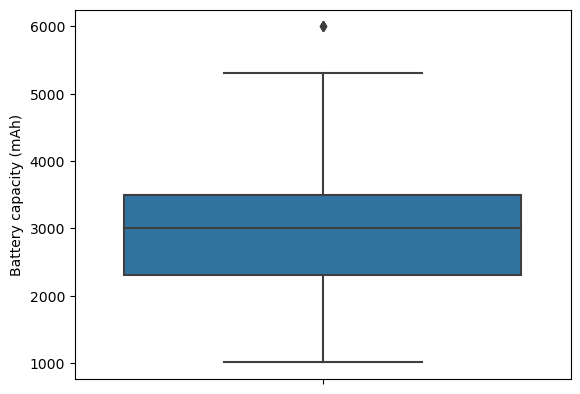

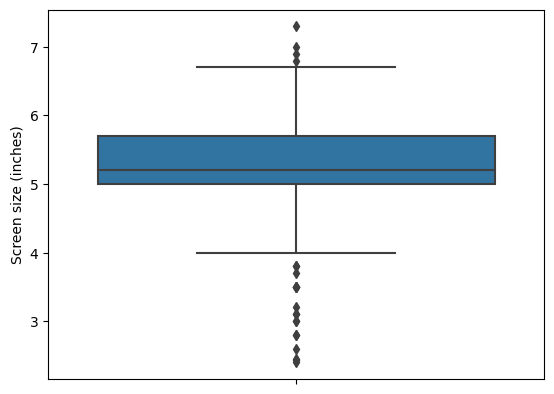

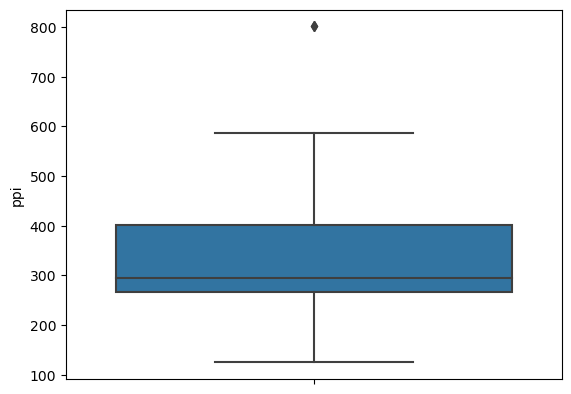

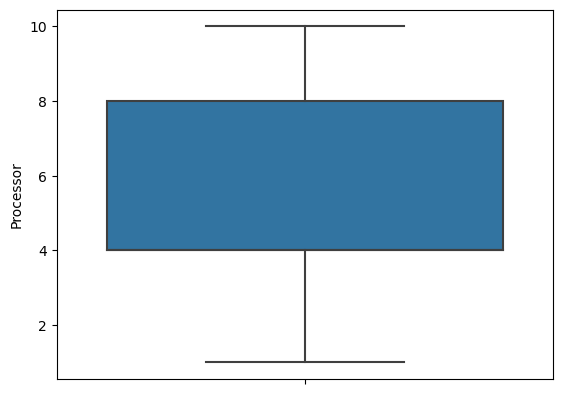

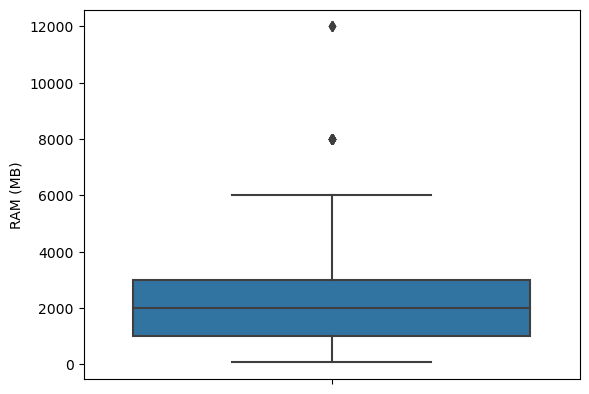

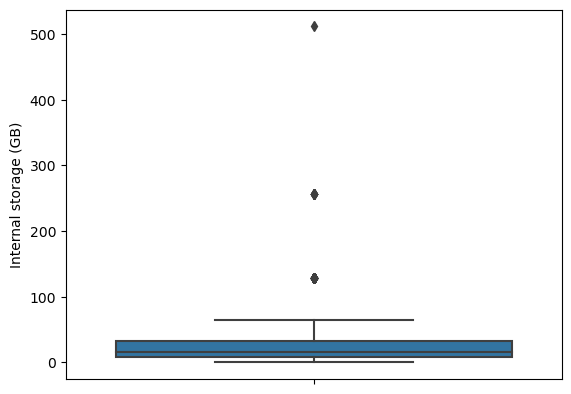

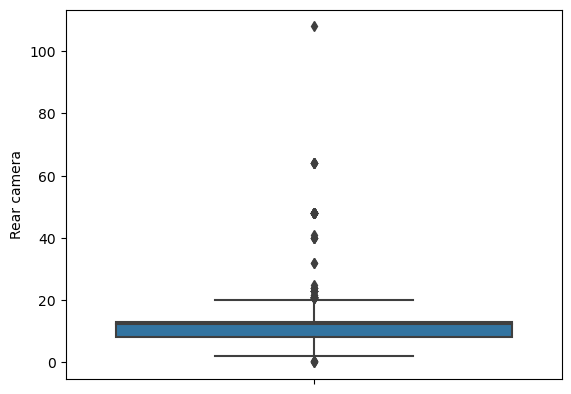

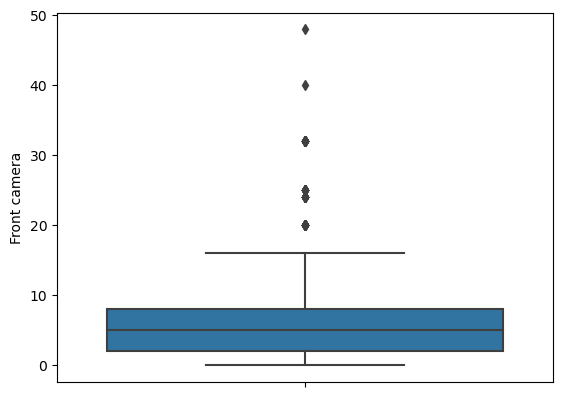

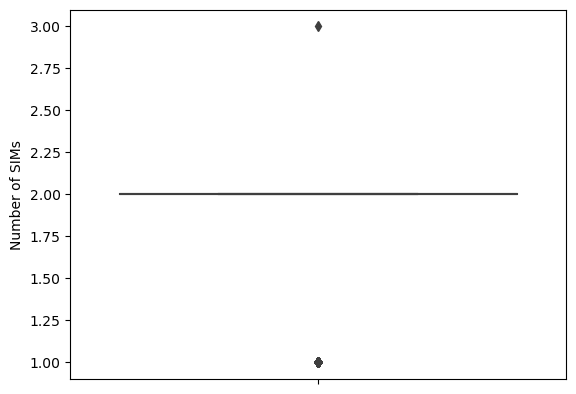

In [273]:
for var in numerical_features:
    sns.boxplot(y=data[var])
    plt.show()

In [274]:
for var in num_var:
    q1=data[var].quantile(.25)
    q3=data[var].quantile(.75)
    iqr=q3-q1
    upper_bound=q3+1.5*iqr
    lower_bound=q1-1.5*iqr
    data[var]=np.where(data[var]>=upper_bound, upper_bound,data[var])
    data[var]=np.where(data[var]<=lower_bound, lower_bound,data[var])

## 7. Label Encoding

In [275]:
categorical_features = data.drop(['Price'], axis = 1).select_dtypes(exclude = 'number').columns.tolist()
print(categorical_features,end=',')

['Operating system', '4G/ LTE'],

In [276]:
data["Operating system"].unique()

array(['Android', 'iOS', 'Cyanogen', 'BlackBerry', 'Windows', 'Tizen',
       'Sailfish'], dtype=object)

In [277]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data['Operating system']= label_encoder.fit_transform(data['Operating system'])
data['4G/ LTE']= label_encoder.fit_transform(data['4G/ LTE'])

In [279]:
# Operating System Encoding
# 0: Android
# 1: BlackBerry
# 2: Cyanogen
# 3: SailFish
# 4: Tizen
# 5: Windows
# 6: iOS

#### Distribution of target variable (Price)

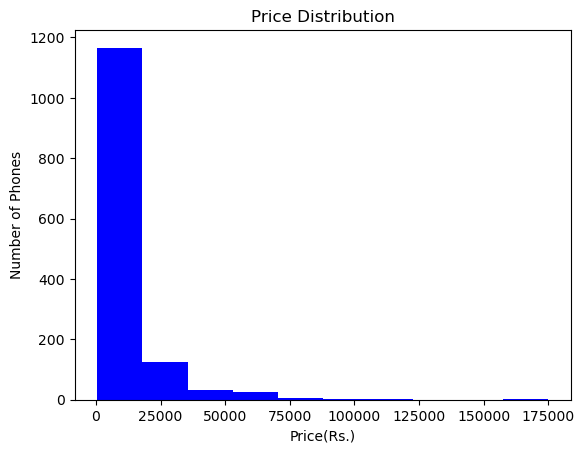

In [280]:
plt.hist(data=data, x="Price", color='blue')
plt.title("Price Distribution")
plt.xlabel("Price(Rs.)")
plt.ylabel("Number of Phones")
plt.show()

* Null hypothesis : Data is normal
* Alter : Data is not normal

In [281]:
from scipy import stats
stats.shapiro(data["Price"])

ShapiroResult(statistic=0.5598320960998535, pvalue=0.0)

As th p-value is 0.0 which is < 0.05, Null Hypothesis is rejected. It means that the price data is not normally distributed

In [282]:
data.shape

(1359, 12)

## 8. Model Development

### Train Test Split

In [283]:
y = data["Price"] 
X = data.drop(["Price"], axis = 1)

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=88)

### Standardizing data

In [96]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [97]:
X_train

Battery capacity (mAh)  Screen size (inches)       ppi  Processor  \
0                   0.081321              1.101512  0.950354  -0.710797   
1                   0.081321              0.546680  1.227161   1.103968   
2                   1.248222             -0.483723 -0.245455  -0.710797   
3                   0.664772              1.735606  0.861775   1.103968   
4                  -0.502129             -0.483723 -0.245455  -0.710797   
...                      ...                   ...       ...        ...   
1082                1.831673              2.211177  2.301174   1.103968   
1083               -1.377305             -2.068958 -0.920865  -0.710797   
1084                0.168839              0.308895 -0.544407   1.103968   
1085               -0.793855             -0.483723 -0.245455  -0.710797   
1086                1.248222              1.513673 -0.522262   1.103968   

      RAM (MB)  Internal storage (GB)  Rear camera  Front camera  \
0     0.388656               0.033201     1.084181      0.298147   
1     0.388656               0.033201     0.442049      1.338416   
2    -0.985246              -0.715847    -0.628171     -1.303868   
3     2.449508               2.601365     1.084181      2.170631   
4    -0.298295              -0.608840    -0.628171      0.298147   
...        ...                    ...          ...           ...   
1082  2.449508               2.601365     0.228005      0.714254   
1083 -0.985246              -0.608840    -1.270303     -0.950176   
1084  0.388656               0.033201     0.442049      1.962577   
1085 -0.985246              -0.608840    -0.628171     -0.950176   
1086  1.075606               0.033201     0.442049      0.298147   

      Operating system  Number of SIMs   4G/ LTE  
0            -0.183519        0.439572  0.596122  
1            -0.183519        0.439572  0.596122  
2            -0.183519        0.439572 -1.677509  
3            -0.183519       -2.244780 -1.677509  
4            -0.183519        0.439572  0.596122  
...                ...             ...       ...  
1082         -0.183519        0.439572  0.596122  
1083         -0.183519        0.439572  0.596122  
1084         -0.183519        0.439572  0.596122  
1085         -0.183519        0.439572 -1.677509  
1086         -0.183519        0.439572  0.596122  

[1087 rows x 11 columns]

## A. Linear Regression Model

In [98]:
lr= LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [99]:
y_train_pred= lr.predict(X_train)
y_pred= lr.predict(X_test)
df=pd.DataFrame(y_pred,y_test)
df

0
Price              
6800   10842.075734
4499   15957.443625
9099    4650.610539
12000   7952.297400
47990  27367.263312
...             ...
6999    7864.530023
4199    3177.076594
7890    7400.175879
13950  17187.971167
6488   21290.511676

[272 rows x 1 columns]

In [100]:
print(lr.intercept_, lr.coef_, lr.score(X_train, y_train))

11529.448022079116 [ -108.27985298   762.93139028  3753.56066616  -728.07710309
  1904.88288915  6991.85720613   220.2632732  -2865.3986789
  2595.72318414   -17.16682318  -145.81177843] 0.545238937198915


### Evaluation of Model

In [101]:
train_predict=lr.predict(X_train)
test_predict=lr.predict(X_test)
r2_train = r2_score(y_train, train_predict)
r2_test = r2_score(y_test, test_predict)

In [102]:
print("MAE of Train", np.mean(np.abs(train_predict-y_train)))
print("MAPE of Train", np.mean(np.abs((train_predict-y_train)/y_train)))
print("MSE of Train", np.mean((train_predict-y_train)**2))
print("RMSE of Train", np.sqrt(np.mean((train_predict-y_train)**2)))
print('Coefficient of Determination (R-squared):', r2_train)

MAE of Train 5271.27741260092
MAPE of Train 0.5358719674808782
MSE of Train 83332317.89027543
RMSE of Train 9128.653673476469
Coefficient of Determination (R-squared): 0.545238937198915


In [103]:
print("MAE of Test", np.mean(np.abs(test_predict-y_test)))
print("MAPE of Test", np.mean(np.abs((test_predict-y_test)/y_test)))
print("MSE of Test", np.mean((test_predict-y_test)**2))
print("RMSE of Test", np.sqrt(np.mean((test_predict-y_test)**2)))
print('Coefficient of Determination (R-squared):', r2_test)

MAE of Test 5023.794379136699
MAPE of Test 0.5576936117293384
MSE of Test 108868996.91932467
RMSE of Test 10434.030712975915
Coefficient of Determination (R-squared): 0.5190348903143818


* As the price data is not mormally distributed Linar Regression model may not be the best one.
* Hence building a DecisonTree and Random Forest Regressor Model.

### Variance Inflation Factor

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['variable'] = X.columns
vif.sort_values(by=["VIF"], ascending=False, inplace=True)
vif

VIF                variable
1   81.625660    Screen size (inches)
0   28.998671  Battery capacity (mAh)
2   27.693021                     ppi
9   24.891456          Number of SIMs
6   21.252245             Rear camera
4   21.220445                RAM (MB)
3   15.943325               Processor
7    7.794828            Front camera
10   4.996358                 4G/ LTE
5    4.515401   Internal storage (GB)
8    1.165223        Operating system

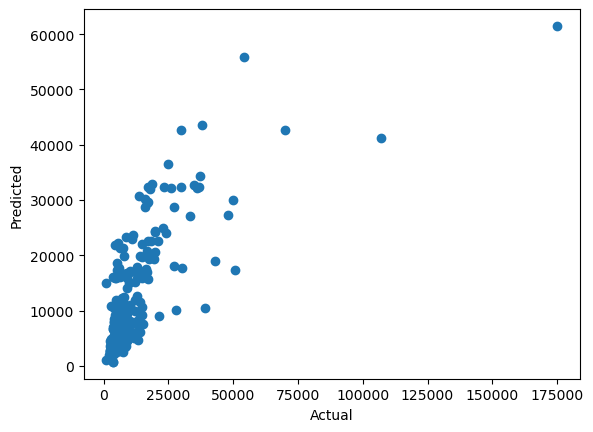

In [105]:
plt.figsize=(10,10)
plt.scatter(y_test, test_predict)
plt.plot()
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## B. Decision Tree Regressor

In [154]:
dt= DecisionTreeRegressor(max_depth=6, criterion="squared_error" , min_samples_leaf=4, min_samples_split=4, random_state=1)
dt.fit(X_train, y_train)
print("Train score :", dt.score(X_train, y_train))
print("Test score :", dt.score(X_test, y_test))

Train score : 0.7163026600708169
Test score : 0.5832846448423449


In [155]:
train_predict=dt.predict(X_train)
test_predict=dt.predict(X_test)
r2_train = r2_score(y_train, train_predict)
r2_test = r2_score(y_test, test_predict)

print("MAE of Train", np.mean(np.abs(train_predict-y_train)))
print("MAPE of Train", np.mean(np.abs((train_predict-y_train)/y_train)))
print("MSE of Train", np.mean((train_predict-y_train)**2))
print("RMSE of Train", np.sqrt(np.mean((train_predict-y_train)**2)))
print('Coefficient of Determination (R-squared):', r2_train)
print("\n")
print("MAE of Test", np.mean(np.abs(test_predict-y_test)))
print("MAPE of Test", np.mean(np.abs((test_predict-y_test)/y_test)))
print("MSE of Test", np.mean((test_predict-y_test)**2))
print("RMSE of Test", np.sqrt(np.mean((test_predict-y_test)**2)))
print('Coefficient of Determination (R-squared):', r2_test)

MAE of Train 3868.75212070339
MAPE of Train 0.3845852495006884
MSE of Train 51985886.324540064
RMSE of Train 7210.123877197954
Coefficient of Determination (R-squared): 0.7163026600708169


MAE of Test 4668.392377320463
MAPE of Test 0.47166935041177765
MSE of Test 94325725.09583561
RMSE of Test 9712.143177272234
Coefficient of Determination (R-squared): 0.5832846448423449


#### Feature Importance

In [156]:
pd.DataFrame({"Features": X.columns, "Imp": dt.feature_importances_}).sort_values(by=["Imp"], ascending=False)

Features       Imp
4                 RAM (MB)  0.431424
2                      ppi  0.271442
8         Operating system  0.080753
6              Rear camera  0.077685
5    Internal storage (GB)  0.075605
1     Screen size (inches)  0.033473
7             Front camera  0.012591
3                Processor  0.010600
0   Battery capacity (mAh)  0.006426
9           Number of SIMs  0.000000
10                 4G/ LTE  0.000000

### Parameter Tuning

In [157]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[4,6,8,10,12,14,16],
              "min_samples_leaf":[4,6,8,10,12],
              'min_samples_split':[4,6,8,10,12]
             }

tr = DecisionTreeRegressor(random_state=88)

gsearch = GridSearchCV(tr, parameters, cv=5, verbose=True, n_jobs=1)

gsearch.fit(X_train, y_train)
gsearch.best_params_

Fitting 5 folds for each of 175 candidates, totalling 875 fits


{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 4}

In [158]:
dt1= DecisionTreeRegressor(max_depth=4, min_samples_leaf=4, min_samples_split=4, random_state=88)
dt1.fit(X_train, y_train)
print("Train score :", dt1.score(X_train, y_train))
print("Test score :", dt1.score(X_test, y_test))

Train score : 0.6422448468018082
Test score : 0.601476888656389


In [84]:
imp=pd.DataFrame({"Var":X_train.columns, "Imp":dt.feature_importances_}).sort_values(by=["Imp"], ascending=False)
imp

Var       Imp
4                 RAM (MB)  0.379571
2             Resolution y  0.246200
8         Operating system  0.110201
5    Internal storage (GB)  0.070826
1     Screen size (inches)  0.053296
6              Rear camera  0.045881
0   Battery capacity (mAh)  0.038640
7             Front camera  0.037244
9           Number of SIMs  0.016671
10                 4G/ LTE  0.001022
3                Processor  0.000448

In [159]:
train_predict=dt1.predict(X_train)
test_predict=dt1.predict(X_test)
r2_train = r2_score(y_train, train_predict)
r2_test = r2_score(y_test, test_predict)

print("MAE of Train", np.mean(np.abs(train_predict-y_train)))
print("MAPE of Train", np.mean(np.abs((train_predict-y_train)/y_train)))
print("MSE of Train", np.mean((train_predict-y_train)**2))
print("RMSE of Train", np.sqrt(np.mean((train_predict-y_train)**2)))
print('Coefficient of Determination (R-squared):', r2_train)
print("\n")
print("MAE of Test", np.mean(np.abs(test_predict-y_test)))
print("MAPE of Test", np.mean(np.abs((test_predict-y_test)/y_test)))
print("MSE of Test", np.mean((test_predict-y_test)**2))
print("RMSE of Test", np.sqrt(np.mean((test_predict-y_test)**2)))
print('Coefficient of Determination (R-squared):', r2_test)

MAE of Train 4460.263563880133
MAPE of Train 0.45550731472028394
MSE of Train 65556549.56377851
RMSE of Train 8096.69991810111
Coefficient of Determination (R-squared): 0.6422448468018082


MAE of Test 4603.5377406815005
MAPE of Test 0.4788204908347907
MSE of Test 90207814.47017427
RMSE of Test 9497.779449438392
Coefficient of Determination (R-squared): 0.601476888656389


**The accuracy of Decision Tree Model has a better R-squared value and Accuracy as compared to a Linear Regression Model.**

**The accuracy of Decision Tree Model is approximately 60%.**

## C. Random Forest Regressor

In [172]:
rf=RandomForestRegressor(n_estimators=500, min_samples_split=8, min_samples_leaf=4)
rf.fit(X_train, y_train)
print("Train score :", rf.score(X_train, y_train))
print("Test score :", rf.score(X_test, y_test))

Train score : 0.7524022959474737
Test score : 0.5919385824632492


In [173]:
train_predict=rf.predict(X_train)
test_predict=rf.predict(X_test)
r2_train = r2_score(y_train, train_predict)
r2_test = r2_score(y_test, test_predict)

print("MAE of Train", np.mean(np.abs(train_predict-y_train)))
print("MAPE of Train", np.mean(np.abs((train_predict-y_train)/y_train)))
print("MSE of Train", np.mean((train_predict-y_train)**2))
print("RMSE of Train", np.sqrt(np.mean((train_predict-y_train)**2)))
print('Coefficient of Determination (R-squared):', r2_train)
print("\n")
print("MAE of Test", np.mean(np.abs(test_predict-y_test)))
print("MAPE of Test", np.mean(np.abs((test_predict-y_test)/y_test)))
print("MSE of Test", np.mean((test_predict-y_test)**2))
print("RMSE of Test", np.sqrt(np.mean((test_predict-y_test)**2)))
print('Coefficient of Determination (R-squared):', r2_test)

MAE of Train 3231.1784830045976
MAPE of Train 0.3049300762859277
MSE of Train 45370838.162616424
RMSE of Train 6735.7878650248795
Coefficient of Determination (R-squared): 0.7524022959474737


MAE of Test 4211.950557529644
MAPE of Test 0.4494316928342701
MSE of Test 92366860.53535618
RMSE of Test 9610.767947222334
Coefficient of Determination (R-squared): 0.5919385824632492


### Hyperparameter Tuning

#### 1. Grid Search

In [174]:
params={"n_estimators":[200,500],
       "max_depth":[4,6,8,10,12],
       "min_samples_split":[4,6,8,10],
       "min_samples_leaf":[4,6,8],
#        "max_features":["sqrt"],
#        "bootstrap":[False]
       }

In [175]:
rf_gs=RandomForestRegressor(random_state=1)
g_rf=GridSearchCV(estimator=rf_gs, param_grid=params, cv=10, verbose=2, n_jobs=1)
g_rf.fit(X_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
[CV] END max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   1.2s
[CV] END max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   1.2s
[CV] END max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   1.2s
[CV] END max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   1.1s
[CV] END max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   1.1s
[CV] END max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   1.1s
[CV] END max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   1.1s
[CV] END max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   1.1s
[CV] END max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   1.1s
[CV] END max_depth=8, min_samples_lea

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=1), n_jobs=1,
             param_grid={'max_depth': [8, 10, 12],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [200, 500]},
             verbose=2)

In [178]:
best_parameteres = g_rf.best_params_
best_score = g_rf.best_score_
print("Best Parameters are : ",best_parameteres,"\n")

Best Parameters are :  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200} 



In [174]:
rf1=RandomForestRegressor(bootstrap=False, max_depth=10, max_features='sqrt', min_samples_leaf=4, 
                         min_samples_split=10, n_estimators=200)
rf1.fit(X_train, y_train)
print("Train score :", rf1.score(X_train, y_train))
print("Test score :", rf1.score(X_test, y_test))

Train score : 0.7607940537777964
Test score : 0.6082316024878911


In [175]:
train_predict=rf1.predict(X_train)
test_predict=rf1.predict(X_test)
r2_train = r2_score(y_train, train_predict)
r2_test = r2_score(y_test, test_predict)

print("MAE of Train", np.mean(np.abs(train_predict-y_train)))
print("MAPE of Train", np.mean(np.abs((train_predict-y_train)/y_train)))
print("MSE of Train", np.mean((train_predict-y_train)**2))
print("RMSE of Train", np.sqrt(np.mean((train_predict-y_train)**2)))
print('Coefficient of Determination (R-squared):', r2_train)
print("\n")
print("MAE of Test", np.mean(np.abs(test_predict-y_test)))
print("MAPE of Test", np.mean(np.abs((test_predict-y_test)/y_test)))
print("MSE of Test", np.mean((test_predict-y_test)**2))
print("RMSE of Test", np.sqrt(np.mean((test_predict-y_test)**2)))
print('Coefficient of Determination (R-squared):', r2_test)

MAE of Train 3321.4746296737367
MAPE of Train 0.328134170924707
MSE of Train 43833097.3831677
RMSE of Train 6620.656869463007
Coefficient of Determination (R-squared): 0.7607940537777964


MAE of Test 4118.760168494197
MAPE of Test 0.44196943812411643
MSE of Test 88678849.26146424
RMSE of Test 9416.944794436477
Coefficient of Determination (R-squared): 0.6082316024878911


In [176]:
y_pred=rf.predict(X_test)
df=pd.DataFrame(y_pred,y_test)
print(df.to_string())

                   0
Price               
6800     5871.226593
4499    11528.313247
9099     6007.945172
12000    6592.156906
47990   30873.280843
11586    9879.921434
4888     3276.864603
3675     7638.890694
16900   23944.071835
6495     6636.688139
34930   31807.902923
69999   54369.340856
26999   13366.103617
1999     3347.670924
3887     3976.973459
106900  62829.377027
2499     3454.349502
3994     9155.015349
14000    8183.482445
7450     6808.581074
19999   28548.557878
7450     6592.156906
6990     9376.733983
4490     6503.121596
2599     3464.224860
6500     2830.456217
14980    8238.148094
8600     8731.746207
7999     8529.629142
12999    9045.651304
6990     8041.188732
7999     6766.072869
6990    12360.658664
7999     8398.974329
6600     6617.579185
16650   15842.322618
9990     8232.961797
19999   10613.596650
37999   50986.836643
10500    9264.470196
7499    16731.188501
8999     7917.970534
3199     6442.038305
7389     4829.230993
8499     7909.096351
14990   27032

### 3. Linespace function to find the parameters using Gridsearch

In [269]:
params={"n_estimators":[int(x) for x in np.linspace(100,500, num=5)],
       "max_depth":[int(x) for x in np.linspace(1,20, num=5)],
       "min_samples_split":[int(x) for x in np.linspace(1,20,num=5)],
       "min_samples_leaf":[int(x) for x in np.linspace(1,30,num=5)],
       "max_features":["sqrt","log"],
       "bootstrap":[True,False]}

In [270]:
rf_gs=RandomForestRegressor(random_state=1)
g_rf=GridSearchCV(estimator=rf_gs, param_grid=params, cv=10, verbose=2, n_jobs=1)
g_rf.fit(X_train, y_train)

best_parameteres = g_rf.best_params_
best_score = g_rf.best_score_
print("Best Parameters are : ",best_parameteres,"\n")
print("Best Socre is : ",best_score)

Fitting 10 folds for each of 2500 candidates, totalling 25000 fits
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total t

Buiding a model with the above parameters

In [177]:
rf2=RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt', min_samples_leaf=4, 
                         min_samples_split=10, n_estimators=300)
rf2.fit(X_train, y_train)
print("Train score :", rf2.score(X_train, y_train))
print("Test score :", rf2.score(X_test, y_test))

Train score : 0.7672498863402734
Test score : 0.6104525007607442


In [178]:
train_predict=rf2.predict(X_train)
test_predict=rf2.predict(X_test)
r2_train = r2_score(y_train, train_predict)
r2_test = r2_score(y_test, test_predict)

print("MAE of Train", np.mean(np.abs(train_predict-y_train)))
print("MAPE of Train", np.mean(np.abs((train_predict-y_train)/y_train)))
print("MSE of Train", np.mean((train_predict-y_train)**2))
print("RMSE of Train", np.sqrt(np.mean((train_predict-y_train)**2)))
print('Coefficient of Determination (R-squared):', r2_train)
print('\n')
print("MAE of Test", np.mean(np.abs(test_predict-y_test)))
print("MAPE of Test", np.mean(np.abs((test_predict-y_test)/y_test)))
print("MSE of Test", np.mean((test_predict-y_test)**2))
print("RMSE of Test", np.sqrt(np.mean((test_predict-y_test)**2)))
print('Coefficient of Determination (R-squared):', r2_test)

MAE of Train 3220.2010657345418
MAPE of Train 0.3107885732232114
MSE of Train 42650103.64129136
RMSE of Train 6530.704681831155
Coefficient of Determination (R-squared): 0.7672498863402734


MAE of Test 4111.478998468859
MAPE of Test 0.4423942800295855
MSE of Test 88176137.18868329
RMSE of Test 9390.214970312623
Coefficient of Determination (R-squared): 0.6104525007607442


### 4. Randomized Search

In [203]:
params={"n_estimators":[200,500],
       "max_depth":[9,10,11],
       "min_samples_split":[6,8,10],
       "min_samples_leaf":[4,6,8],
       "max_features":["sqrt","log"],
       "bootstrap":[True,False]}

In [204]:
rf_rs=RandomForestRegressor(random_state=1)
rf_search=RandomizedSearchCV(estimator=rf_rs, param_distributions=params,cv=5, n_jobs=1, verbose=2)
rf_search.fit(X_train, y_train)
rf_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=9, max_features=log, min_samples_leaf=8, min_samples_split=6, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=9, max_features=log, min_samples_leaf=8, min_samples_split=6, n_estimators=500; total

RandomForestRegressor(bootstrap=False, max_depth=11, max_features='sqrt',
                      min_samples_leaf=4, min_samples_split=6, n_estimators=200,
                      random_state=1)

In [285]:
rf3=RandomForestRegressor(bootstrap=False, max_depth=11, max_features='sqrt', min_samples_leaf=4, 
                         min_samples_split=6, n_estimators=200, random_state=1)
rf3.fit(X_train, y_train)
print("Train score :", rf3.score(X_train, y_train))
print("Test score :", rf3.score(X_test, y_test))

Train score : 0.7779773050326357
Test score : 0.6341739962500406


In [286]:
train_predict=rf3.predict(X_train)
test_predict=rf3.predict(X_test)
r2_train = r2_score(y_train, train_predict)
r2_test = r2_score(y_test, test_predict)

print("MAE of Train", np.mean(np.abs(train_predict-y_train)))
print("MAPE of Train", np.mean(np.abs((train_predict-y_train)/y_train)))
print("MSE of Train", np.mean((train_predict-y_train)**2))
print("RMSE of Train", np.sqrt(np.mean((train_predict-y_train)**2)))
print('Coefficient of Determination (R-squared):', r2_train)
print("\n")
print("MAE of Test", np.mean(np.abs(test_predict-y_test)))
print("MAPE of Test", np.mean(np.abs((test_predict-y_test)/y_test)))
print("MSE of Test", np.mean((test_predict-y_test)**2))
print("RMSE of Test", np.sqrt(np.mean((test_predict-y_test)**2)))
print('Coefficient of Determination (R-squared):', r2_test)

MAE of Train 3219.9880949319327
MAPE of Train 0.31584838045420915
MSE of Train 40684366.60323487
RMSE of Train 6378.429791354207
Coefficient of Determination (R-squared): 0.7779773050326357


MAE of Test 4019.9854401027037
MAPE of Test 0.4384786431495046
MSE of Test 82806651.19616699
RMSE of Test 9099.815997929134
Coefficient of Determination (R-squared): 0.6341739962500406


**The accuracy of the Random Forest Model is approximately 63.4%.**

#### Predicting a sample

In [290]:
input_data=(2500,5,294,8,3000,16,13,8,0,2,1)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=rf3.predict(input_data_reshaped)
print(prediction)

[8489.06580169]


### Saving the model in a pickle file to use for prediction

In [297]:
import pickle
pickle.dump(rf3, open('rf_model.pkl', 'wb'))

## D. K Nearest Neighbors

In [210]:
from sklearn.neighbors import KNeighborsRegressor

In [211]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
print("Train score :", knn.score(X_train, y_train))
print("Test score :", knn.score(X_test, y_test))

Train score : 0.717220306972671
Test score : 0.5556972094378869


In [212]:
params={"n_neighbors":[5,7,9,11,13,15],
       "p":[1,2,3,4],
       "algorithm":["ball_tree","kd_tree","brute"]}

knn2=KNeighborsRegressor()
gsearch_knn2=GridSearchCV(estimator=knn2,param_grid=params, n_jobs=1, verbose=2, cv=5)
gsearch_knn2.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END ............algorithm=ball_tree, n_neighbors=5, p=1; total time=   0.0s
[CV] END ............algorithm=ball_tree, n_neighbors=5, p=1; total time=   0.0s
[CV] END ............algorithm=ball_tree, n_neighbors=5, p=1; total time=   0.0s
[CV] END ............algorithm=ball_tree, n_neighbors=5, p=1; total time=   0.0s
[CV] END ............algorithm=ball_tree, n_neighbors=5, p=1; total time=   0.0s
[CV] END ............algorithm=ball_tree, n_neighbors=5, p=2; total time=   0.0s
[CV] END ............algorithm=ball_tree, n_neighbors=5, p=2; total time=   0.0s
[CV] END ............algorithm=ball_tree, n_neighbors=5, p=2; total time=   0.0s
[CV] END ............algorithm=ball_tree, n_neighbors=5, p=2; total time=   0.0s
[CV] END ............algorithm=ball_tree, n_neighbors=5, p=2; total time=   0.0s
[CV] END ............algorithm=ball_tree, n_neighbors=5, p=3; total time=   0.0s
[CV] END ............algorithm=ball_tree, n_nei

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'p': [1, 2, 3, 4]},
             verbose=2)

In [214]:
gsearch_knn2.best_score_

0.5764351346229634

In [215]:
gsearch_knn2.best_params_

{'algorithm': 'brute', 'n_neighbors': 7, 'p': 1}

In [216]:
knn3=KNeighborsRegressor(algorithm="brute", n_neighbors=7, p=1)
knn3.fit(X_train,y_train)

KNeighborsRegressor(algorithm='brute', n_neighbors=7, p=1)

In [217]:
knn3.score(X_train,y_train)

0.6894647223018726

In [218]:
knn3.score(X_test,y_test)

0.5620037122564411

In [219]:
train_predict=knn3.predict(X_train)
test_predict=knn3.predict(X_test)
r2_train = r2_score(y_train, train_predict)
r2_test = r2_score(y_test, test_predict)

print("MAE of Train", np.mean(np.abs(train_predict-y_train)))
print("MAPE of Train", np.mean(np.abs((train_predict-y_train)/y_train)))
print("MSE of Train", np.mean((train_predict-y_train)**2))
print("RMSE of Train", np.sqrt(np.mean((train_predict-y_train)**2)))
print('Coefficient of Determination (R-squared):', r2_train)
print("\n")
print("MAE of Test", np.mean(np.abs(test_predict-y_test)))
print("MAPE of Test", np.mean(np.abs((test_predict-y_test)/y_test)))
print("MSE of Test", np.mean((test_predict-y_test)**2))
print("RMSE of Test", np.sqrt(np.mean((test_predict-y_test)**2)))
print('Coefficient of Determination (R-squared):', r2_test)

MAE of Train 3805.230253646997
MAPE of Train 0.3483077577834971
MSE of Train 56903782.21453918
RMSE of Train 7543.459565381071
Coefficient of Determination (R-squared): 0.6894647223018726


MAE of Test 3867.8844537815125
MAPE of Test 0.4099232823152819
MSE of Test 99142776.76440573
RMSE of Test 9957.046588442063
Coefficient of Determination (R-squared): 0.5620037122564411


### E. XGBoost

In [224]:
xg = XGBRegressor(n_estimators=100,learning_rate=.01, max_depth=10)
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [225]:
xg.score(X_train,y_train)

0.5803526273726201

In [226]:
xg.score(X_test,y_test)

0.323452819951644

In [227]:
xg.feature_importances_

array([0.01297602, 0.04589705, 0.12097614, 0.00458563, 0.45779857,
       0.03829164, 0.0312974 , 0.02400858, 0.22434618, 0.03245915,
       0.00736369], dtype=float32)

### Parameter Tuning

In [228]:
params={"n_estimators":[100,150,200,250],
       "max_depth":[4,6,8,10,12],
       "max_leaves":[6,8,10],
       "learning_rate":[0.01,0.015]}
xgb1=XGBRegressor()
xgb_gs=GridSearchCV(xgb1,param_grid=params, cv=5, n_jobs=1, verbose=2)
xgb_gs.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END learning_rate=0.01, max_depth=4, max_leaves=6, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, max_leaves=6, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, max_leaves=6, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, max_leaves=6, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, max_leaves=6, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, max_leaves=6, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, max_leaves=6, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, max_leaves=6, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, max_leaves=6, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, max_leaves=6, n_estimators=150; total time=   0.1s
[CV] EN

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.015],
                         'max_depth': [4, 6, 8, 10, 12],
                         'max_leaves': [6, 8, 10],
                         'n_estimators': [100, 150, 200, 250]},
             verbose=2)

In [229]:
xgb_gs.best_params_

{'learning_rate': 0.015, 'max_depth': 4, 'max_leaves': 6, 'n_estimators': 250}

In [230]:
xgb2=XGBRegressor(n_estimators=250, max_depth=4, max_leaves=6, learning_rate=.015)
xgb2.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.015, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=6,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=250, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [231]:
xgb2.score(X_train,y_train)

0.7736391395441038

In [232]:
xgb2.score(X_test,y_test)

0.5625802537277972

In [233]:
train_predict=xgb2.predict(X_train)
test_predict=xgb2.predict(X_test)
r2_train = r2_score(y_train, train_predict)
r2_test = r2_score(y_test, test_predict)

print("MAE of Train", np.mean(np.abs(train_predict-y_train)))
print("MAPE of Train", np.mean(np.abs((train_predict-y_train)/y_train)))
print("MSE of Train", np.mean((train_predict-y_train)**2))
print("RMSE of Train", np.sqrt(np.mean((train_predict-y_train)**2)))
print('Coefficient of Determination (R-squared):', r2_train)
print("\n")
print("MAE of Test", np.mean(np.abs(test_predict-y_test)))
print("MAPE of Test", np.mean(np.abs((test_predict-y_test)/y_test)))
print("MSE of Test", np.mean((test_predict-y_test)**2))
print("RMSE of Test", np.sqrt(np.mean((test_predict-y_test)**2)))
print('Coefficient of Determination (R-squared):', r2_test)

MAE of Train 3609.7561363072823
MAPE of Train 0.37588396279161096
MSE of Train 41479310.17937188
RMSE of Train 6440.443321648897
Coefficient of Determination (R-squared): 0.7736391395441038


MAE of Test 4159.947671329274
MAPE of Test 0.44260629648111266
MSE of Test 99012273.55241607
RMSE of Test 9950.491121166637
Coefficient of Determination (R-squared): 0.5625802537277972


## 9. Model Evaluation

### Evaluation of Models based on Accuracy

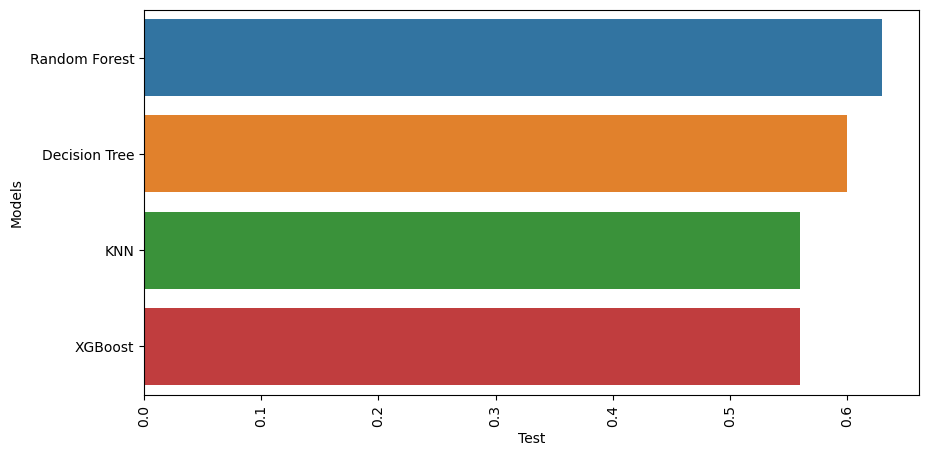

In [92]:
data = {'Models' : ['Random Forest', 'Decision Tree', 'KNN', 'XGBoost'],
'Train' : [0.77, 0.64, 0.68, 0.77],
'Test' : [0.63, 0.60, 0.56, 0.56]}
df = pd.DataFrame(data)
sns.barplot(x='Test', y='Models', data=df)
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.xticks(rotation=90)
plt.show()

**The Decision Tree Model has the Highest R-squared value and Accuracy.**

In [93]:
df

Models  Train  Test
0  Random Forest   0.77  0.63
1  Decision Tree   0.64  0.60
2            KNN   0.68  0.56
3        XGBoost   0.77  0.56

### Evaluation of Models based on Mean Absolute Error

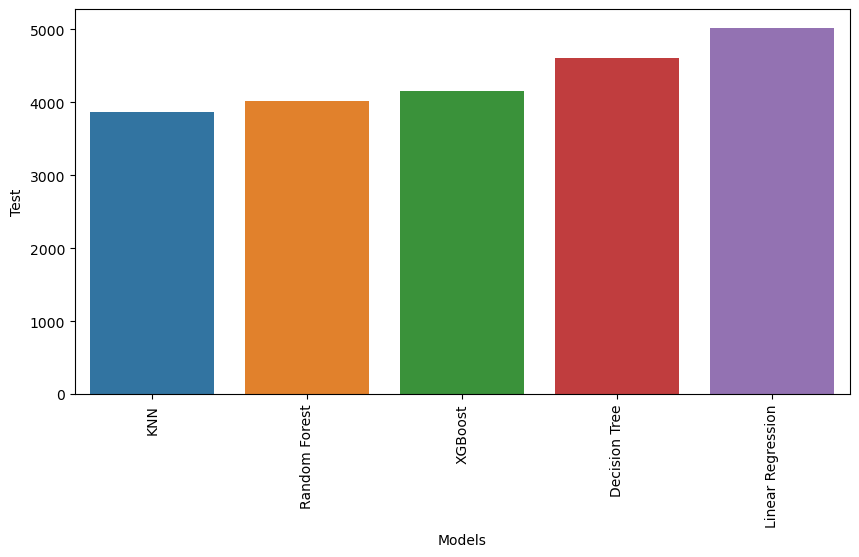

In [94]:
data = {'Models' : ['KNN', 'Random Forest', 'XGBoost', 'Decision Tree', 'Linear Regression'],
'Train' : [3805, 3219, 3609, 4460, 5271],
'Test' : [3867, 4017, 4159, 4603, 5023]}
df = pd.DataFrame(data)
sns.barplot(x='Models', y='Test', data=df)
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.xticks(rotation=90)
plt.show()

In [96]:
df

Models  Train  Test
0                KNN   3805  3867
1      Random Forest   3219  4017
2            XGBoost   3609  4159
3      Decision Tree   4460  4603
4  Linear Regression   5271  5023